# Environment Setup #

In [1]:
# Import libraries

import pandas as pd
import numpy as np
from sklearn.cross_validation import ShuffleSplit, train_test_split
from sklearn.tree import DecisionTreeRegressor

# Visualization libraries
import matplotlib.pyplot as plt
import sklearn.learning_curve as curves

# Pretty display for the Notebook
%matplotlib inline

D:\Anaconda\Anaconda3\envs\py35\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
D:\Anaconda\Anaconda3\envs\py35\lib\site-packages\sklearn\learning_curve.py:23: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


In [2]:
# Define visualization functions - Learning Curve

def ModelLearning(X, y):
    """ Calculate the performance of several models with varying sizes of training data. 
        The learning and testing scores for each model are then plotted. """
    
    # Create 10 cross-validation sets for training and testing
    cv = ShuffleSplit(X.shape[0], n_iter=10, test_size=0.2, random_state=0)
    
    # Generate the training set sizes increasing by 50
    train_sizes = np.rint(np.linspace(1, X.shape[0]*0.8-1, 9)).astype(int)
    
    # Create the figure window:    
    fig = plt.figure(figsize=(10,7))
    
    # Create three different models based on max_depth
    for k, depth in enumerate([1,3,6,10]):
        
        # Create a Decision Tree Regressor at max_depth=depth
        regressor = DecisionTreeRegressor(max_depth=depth)
        
        # Calculate the training and testing scores
        sizes, train_scores, test_scores = curves.learning_curve(regressor, X, y, cv=cv, train_sizes=train_sizes, scoring='r2')
        
        # Find the mean and standard deviation for smoothing
        train_std = np.std(train_scores, axis=1)
        train_mean = np.mean(train_scores, axis=1)
        test_std = np.std(test_scores, axis=1)
        test_mean = np.mean(test_scores, axis=1)
        
        # Subplot the learning curve
        ax = fig.add_subplot(2, 2, k+1) # k starts from 0
        ax.plot(sizes, train_mean, 'o-', color='r', label='Training Score')
        ax.plot(sizes, test_mean, 'o-', color='g', label='Testing Score')
        ax.fill_between(sizes, train_mean-train_std, train_mean+train_std, alpha=0.15, color='r')
        ax.fill_between(sizes, test_mean-test_std, test_mean+test_std, alpha=0.15, color='g')
        
        # Labels
        ax.set_title('max_depth = %s'%(depth))
        ax.set_xlabel('Number of Training Points')
        ax.set_ylabel('Score')
        ax.set_xlim([0, X.shape[0]*0.8])
        ax.set_ylim([-0.05, 1.05])
        
    # Visual aesthetics
    ax.legend(bbox_to_anchor=(1.05, 2.05), loc='lower left', borderaxespad=0.)
    fig.suptitle('Decision Tree Regressor Learning Performances', fontsize=16, y=1.03)
    fig.tight_layout()
    fig.show()

In [3]:
# Define visualization functions - Model Complexity

def ModelComplexity(X, y):
    """Calculates the performance of the model as model complexity increases.
        The learning and testing errors rates are then plotted. """
    
    # Create 10 cross-validation sets for training and testing
    cv = ShuffleSplit(X.shape[0], n_iter=10, test_size=0.2, random_state=0)
    
    # Vary the max_depth parameter from 1 to 10
    max_depth = np.arange(1,11)
    
    # Calculate the training and testing scores
    train_scores, test_scores = curves.validation_curve(DecisionTreeRegressor(), X, y, param_name="max_depth",
                                                       param_range=max_depth, cv=cv, scoring='r2')
    
    # Find the mean and standard deviation for smoothing
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    
    # Plot the validation curve
    plt.figure(figsize=(7, 5))
    plt.title('Decision Tree Regressor Complexity Performance')
    plt.plot(max_depth, train_mean, 'o-', color='r', label='Training Score')
    plt.plot(max_depth, test_mean, 'o-', color='g', label='Validation Score')
    plt.fill_between(max_depth, train_mean-train_std, train_mean+train_std, alpha=0.15, color='r')
    plt.fill_between(max_depth, test_mean-test_std, test_mean+test_std, alpha=0.15, color='g')
    
    # Visual aesthetics
    plt.legend(loc='lower right')
    plt.xlabel('Maximum Depth')
    plt.ylabel('Score')
    plt.ylim([-0.05, 1.05])
    plt.show()

In [4]:
# Define visualization functions - Prediction Performance

def PredictTrials(X, y, fitter, data):
    """ Performs trials of fitting and predicting data. """
    
    # Store the predicted prices
    prices = []
    
    for k in range(10):
        # Split the data
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=k)
        
        # Fit the data:
        reg = fitter(X_train, y_train)
        
        # Make a prediction 
        pred = reg.predict([data[0]])[0]
        prices.append(pred)
        
        # Result
        print("Trial {}: ${:,.2f}".format(k+1, pred))
        
    # Display price range
    print("\nRange in prices: ${:,.2f}".format(max(prices)-min(prices)))

In [5]:
# Change working directory

import os
os.chdir('F:/Data_Analytics/Udacity_ML_Engr')

# Data Exploration #

In [6]:
# Load the Boston Housing

data = pd.read_csv('housing.csv')
prices = data['MEDV']
features = data.drop('MEDV', axis=1)

In [7]:
# Eye-balling the dataset
data.head()

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0


In [8]:
# Dimension ofthe datset
print("Boston housing dataset has {} data points with {} variables each.".format(*data.shape))

Boston housing dataset has 489 data points with 4 variables each.


## Calculate Statistics ##

In [9]:
# TODO: Minimum price off the data
minimum_price = np.min(prices)

# TODO: Maximum price of the data
maximum_price = np.max(prices)

#TODO: Mean price of the data
mean_price = np.mean(prices)

# TODO: Median price of the data
median_price = np.median(prices)

# TODO: Standard deviation of prices
std_price = np.std(prices)

# Show the calculated statistics
print("Statistics for Boston Housing dataset:\n")
print("Minimum price: ${:,.2f}".format(minimum_price))
print("Maximum price: ${:,.2f}".format(maximum_price))
print("Mean price: ${:,.2f}".format(mean_price))
print("Median price: ${:,.2f}".format(median_price))
print("Standard deviation of prices: ${:,.2f}".format(std_price))

Statistics for Boston Housing dataset:

Minimum price: $105,000.00
Maximum price: $1,024,800.00
Mean price: $454,342.94
Median price: $438,900.00
Standard deviation of prices: $165,171.13


** Question 1 - Feature Observation **
  
As a reminder, we are using three features from the Boston housing dataset: 'RM', 'LSTAT', and 'PTRATIO. Using your intuition, for each of the three features above, do you think that an increase in the value of that feature would lead to an increase in the value of 'MEDV' or a decrease in the value of 'MEDV'? Justify your answer for each.

D:\Anaconda\Anaconda3\envs\py35\lib\site-packages\IPython\html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


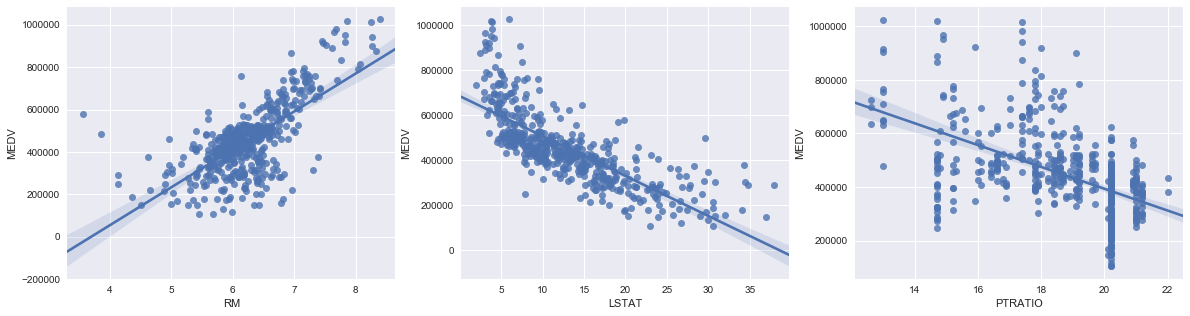

In [10]:
# Use scatterplots to show the relationships

import seaborn as sns

plt.figure(figsize=(20,5))

for i, feature in enumerate(features.columns):
    plt.subplot(1, 3, i+1)
    sns.regplot(features[feature], prices)

    plt.xlabel(feature)
    plt.ylabel('MEDV')

** Answer 1: **
  
1. The higher the 'RM' (number of rooms), the higher the 'MEDV' (home price). More rooms in the apartment, the larger the apartment, which naturally relate to higher price per apartment when other factors remain the same. 

2. The higher the 'LSTAT' (percentage of lower class workers), the lower the 'MEDV' (home price). On one hand, lower class workers tend to live in lower housing price neighborhood. On the other hand, buyers would be less willing to pay a high price for apartments when the neighborhood has higher percentage of lower class workers.

3. The higher the 'PTRATIO' (ratio of students to teachers), the lower the 'MEDV' (home price). Higher the students-to-teachers ratio means less accessible to education resources. People are more willing to buy houses in neighborhood with good access to education.


# Developing a Model #

## Define a Performance Metric ##

In [11]:
# TODO: Import 'r2_score'
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score betwen true and predicted values based on the metric chosen. """
    
    # TODO: Calculate the performance score between 'y_true' and 'y_predict'
    score = r2_score(y_true, y_predict)
    
    # Return the score
    return score
    

** Question 2 - Goodness of Fit **
  
Run the code cell below to use the performance_metric() function and calculate this model's coefficient of determination.

1. Would you consider this model to have successfully captured the variation of the target variable?
2. Why or why not?

In [12]:
# Calculate the performance of this model

score = performance_metric([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
print("Model has a coefficient of determination, R^2, of {:,.3f}.".format(score))

Model has a coefficient of determination, R^2, of 0.923.


** Answer 2: **

1. This model have successfully captured the variation of the target variable.
2. Because it has a R2 score of 0.923, which is very close to 1, meaning 92.3% of the variance in response variable is able to be captured by predictors using this model.

## Shuffle and Split Data ##

In [13]:
# TODO: Import 'train_test_split'
from sklearn.model_selection import train_test_split

# TODO: Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size=0.2, random_state=0)

# Check result
print("Training and testing split was successful.\n" 
      "There are {} observations in the training set, {} observations in the testing set.".format(X_train.shape[0],len(X_test)))

Training and testing split was successful.
There are 391 observations in the training set, 98 observations in the testing set.


** Question 3 - Training and Testing **

What is the benefit to splitting a dataset into some ratio of training and testing subsets for a learning algorithm?

In [14]:
# Example of overfitting

# Instantiate the regressor object
dt_regressor = DecisionTreeRegressor(max_depth=5, random_state=0)

# Fit the model with training data
dt_regressor.fit(X_train, y_train)

# Make prediction on training set
y_pred_in_sample = dt_regressor.predict(X_train)

# In-sample prediction performance
accuracy_train = performance_metric(y_train, y_pred_in_sample)

# Make prediction on testing set
y_pred_out_sample = dt_regressor.predict(X_test)

# Out-of-sample prediction performance
accuracy_test = performance_metric(y_test, y_pred_out_sample)

print("In sample prediction score on {} observations in training set is {}".format(X_train.shape[0],accuracy_train))
print("Out of sample prediction score on {} observations in testing set is {}".format(X_test.shape[0],accuracy_test))

In sample prediction score on 391 observations in training set is 0.9052263386952947
Out of sample prediction score on 98 observations in testing set is 0.7606734120065759


** Answer 3: **

Testing subset can check if the learning algorithm has underfitted or overfitted the training set, which is a subset of the whole dataset. Overfitting means the outcome parameters we get by learning from training set is too closely capturing this specific dataset, and lost the robustness of describing or predicting other datasets. 

For example, in the sample training process above, the Decision Tree Regressor yields 0.9052 R^2, which is very high. However, if we use the same parameters to predict the testing set, the R^2 is only 0.76, which is lower than the prediction of training set. 

Therefore, we need a testing set that is different from the training set to see if the model can capture the overall nature of the whole dataset, instead of only a certain part of it.



# Analyzing Model Performance #

## Learning Curves ##

Run the code cell below and use these graphs to answer the following question.

D:\Anaconda\Anaconda3\envs\py35\lib\site-packages\matplotlib\figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


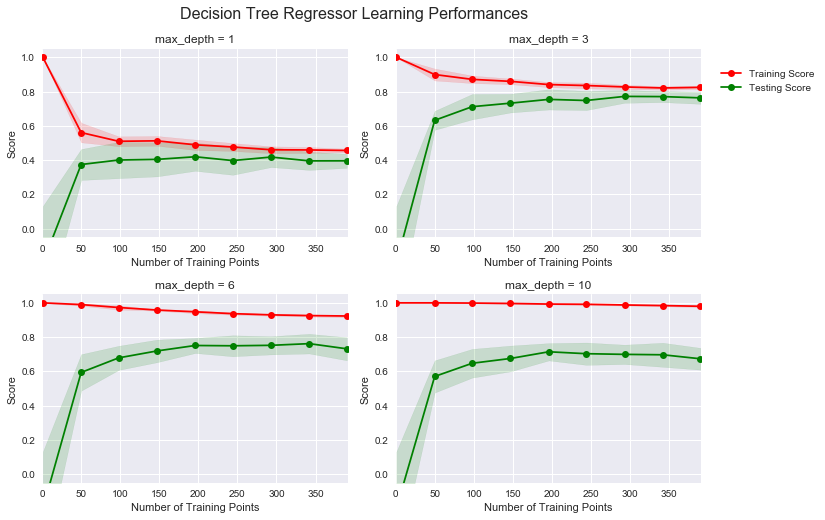

In [15]:
# Produce learning curves for varying training set sizes and maximum depths
ModelLearning(features, prices)

** Question 4 - Learning the Data **

1. Choose one of the graphs above and state the maximum depth for the model.
2. What happens to the score of the training curve as more training points are added? What about the testing curve?
3. Would having more training points benefit the model?

** Answer 4: **

1. For the graph at the upper right, the maximum depth for the model is 3.
2. When more training points are added, the score of the training curve slightly decreased while the score of the testing curve increased and then remained stready.
3. Before the size of training set reaches a certain level, having more training points would benefit the model's performance for the testing set. However, the increment of model performance when adding training points decreases. From the graphs above, we can see that at first the model performances are improved significantly when new training points are added, but the learning curves for training sets flattened after the number of training points reached certain levels.

## Complexity Curves ##

The following code cell produces a graph for a decision tree model that has been trained and validated on the training data using different maximum depths. The graph produces two complexity curves — one for training and one for validation. Similar to the learning curves, the shaded regions of both the complexity curves denote the uncertainty in those curves, and the model is scored on both the training and validation sets using the performance_metric function.

Run the code cell below and use this graph to answer the following two questions Q5 and Q6.

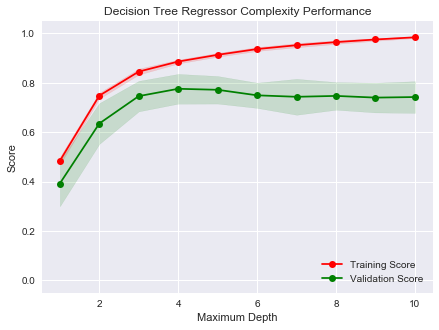

In [16]:
ModelComplexity(X_train, y_train)

** Question 5 - Bias-Variance Tradeoff **

1. When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance?
2. How about when the model is trained with a maximum depth of 10? What visual cues in the graph justify your conclusions?

** Answer 5: **

1. When the model is trained with a max depth of 1, it suffers from high bias. It misses the relevant relations between features and target outputs. It is illustrated by a low performance score.
2. When the model is trained with a max depth of 10, it suffers from high variance. It overfits the training set and cannot be generalized to testing set. It is shown by Training Score significantly higher than Validation Score.

** Question 6 - Best-Guess Optimal Model **

1. Which maximum depth do you think results in a model that best generalizes to unseen data?
2. What intuition lead you to this answer?

** Answer 6: **

1. A maximum depth of 4 would be the best for generalizing to unseen data.
2. The reason is that the Training Score and Testing Score has been increasing from 1 to 4, and the Validation Score starts to decrease after the depth exceeds 5.

# Evaluating Model Performance #

** Question 7 - Grid Search **

1. What is the grid search technique?
2. How it can be applied to optimize a learning algorithm?

** Anwer 7: **

1. Grid search is fixing all the other **hyper-parameters** and change a specific hyper-parameter, cross-validate the model, get the performance metrics, then change to another hyper-parameter and fix the rest of hyper-parameters, do it over and over again until we get the results for all the combinations. Eventually get the optimal performance and the corresponding combination of hyper-parameter values. The reason we need grid search for hyper-parameters is that **the values of these parameters are not learned from the training process**; instead the values are pre-set manually. However, different values of hyper-parameters may influence the model performance significantly. Therefore, we need to use grid search to **feed a grid of hyper-parameters into the model**, in order to see the performance under each value combination of hyper-parameters.  

2. Take the Decision Tree Regressor in this Boston Housing Price analysis as an example. 'max_depth' and 'max_features' are two hyperparameters that can determine the nature of the tree. We can explore different pairs of values for these two hyper-parameters using grid search, then take the pair that generates the best performance and modify our algorithm according to these values. We can **define certain performance metrics to evaluate the training outcomes**. Here we used R^2. That translate to, we choose the 'max_depth' and 'max_features' **combination that generates highest R^2 score**.

** Question 8 - Cross-Validation **
1. What is the k-fold cross-validation training technique?
2. What benefit does this technique provide for grid search when optimizing a model?

** Answer 8: **

1. K-fold cross-validation is a technique in cross-validation where the original sample is randomly partitioned into k equal sized subsamples, then use 1 of the k samples as a validation set for testing the trainig result, the rest k-1 samples as training set. Then iterate through all the k folds of datasets and take each of them as validation set and the rest as training set. Finally the training result would be a combination of k times of training.
2. The benefit is that the result of grid search would be more robust and avoid overfitting. When we do grid search there may be chances that certain combinations of parameters happen to perform well. If we conduct the cross-validation on top of grid search, the outcome would be more stable and prevent the training outcome from random effects.

## Fitting a Model ##

Your final implementation requires that you bring everything together and train a model using the decision tree algorithm.

For the fit_model function in the code cell below, you will need to implement the following:
* Use DecisionTreeRegressor from sklearn.tree to create a decision tree regressor object.
    * Assign this object to the 'regressor' variable.
* Create a dictionary for 'max_depth' with the values from 1 to 10, and assign this to the 'params' variable.
* Use make_scorer from sklearn.metrics to create a scoring function object.
    * Pass the performance_metric function as a parameter to the object.
    * Assign this scoring function to the 'scoring_fnc' variable.
* Use GridSearchCV from sklearn.grid_search to create a grid search object.
    * Pass the variables 'regressor', 'params', 'scoring_fnc', and 'cv_sets' as parameters to the object.
    * Assign the GridSearchCV object to the 'grid' variable.

In [17]:
# TODO: Import 'make_scorer', 'DecisionTreeRegressor', and 'GridSearchCV'
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV

def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    cv_sets = ShuffleSplit(X.shape[0], n_iter=10, test_size=0.2, random_state=0)
    
    # TODO: Create a decision tree regressor object
    regressor = DecisionTreeRegressor()
    
    # TODO: Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {'max_depth': range(1,11)}
    
    # TODO: Transform 'performance_metric' into a scoring function using 'make_scorer'
    scoring_fnc = make_scorer(performance_metric)
    
    # TODO: Create the grid search cv object
    grid = GridSearchCV(estimator=regressor, param_grid=params, scoring=scoring_fnc)
    
    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)
    
    # Return the optimal model after fitting the data
    return grid.best_estimator_

## Making Predictions ##

Gain information about data where the value of the target variable is unknown — such as data the model was not trained on.

** Question 9 - Optimal Model **

1. What maximum depth does the optimal model have? 
2. How does this result compare to your guess in Question 6?

In [18]:
# Fit the training data to the model using grid search 
reg = fit_model(X_train, y_train)

# Produce the value fro 'max_depth'
print("Parameter 'max_depth' is {} for the optimal model".format(reg.get_params()['max_depth']))

Parameter 'max_depth' is 5 for the optimal model


** Answer 9: **

1. The maximum depth from the GridSearchCV() method is 4. 
2. This result is consistent with the result from **Question 6**.

** Question 10 - Predicting Selling Prices **

Imagine that you were a real estate agent in the Boston area looking to use this model to help price homes owned by your clients that they wish to sell. You have collected the following information from three of your clients:

|Feature	|Client 1	 |Client 2	 |Client 3   |
|:----------|:-----------|:----------|:----------|
|Total number of rooms in home    |5   |4   |8   |
|Neighborhood poverty level (as %)|17% |32% |3%  |
|Student-teacher ratio of nearby schools|15-to-1|22-to-1|12-to-1|

1. What price would you recommend each client sell his/her home at?
2. Do these prices seem reasonable given the values for the respective features?

In [19]:
# Produce a matrix for client data
client_data = [[5, 17, 15],    # Client 1
               [4, 32, 22],    # Client 2
               [8, 3, 12]]     # Client 3

# Show predictions 
print("Predicted selling price for clients' homes are as follows:")
for i, price in enumerate(reg.predict(client_data)):
    print("Client {}: ${:,.2f}".format(i+1, price))

Predicted selling price for clients' homes are as follows:
Client 1: $411,000.00
Client 2: $175,700.00
Client 3: $875,700.00


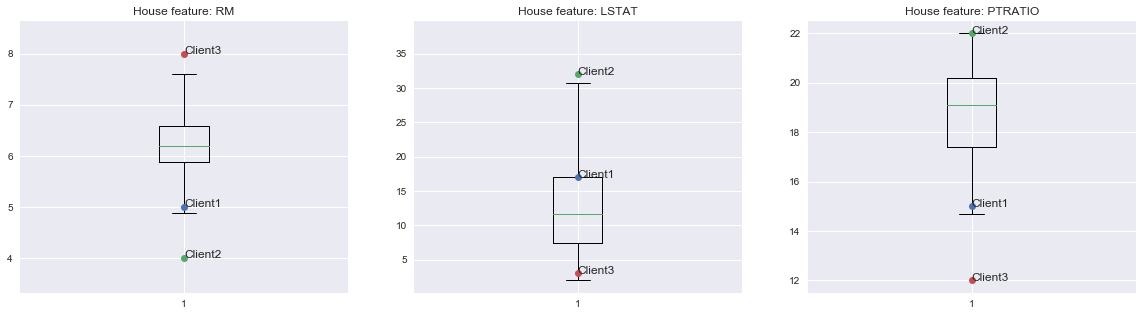

In [22]:
# Visualize the price of clients

plt.figure(figsize=(20,5))

for i, col in enumerate(features.columns):    # iterate through 3 features
    plt.subplot(1,3,i+1)
    plt.boxplot(data[col])
    plt.title('House feature: {}'.format(col))
    for j in range(3):    # iterate through 3 clients
        plt.plot(1, client_data[j][i], marker="o")
        plt.annotate('Client'+str(j+1), xy=(1,client_data[j][i]))    # annotate the points
        

** Answer 10: **

1. Client 1's recommended selling price is \$391,183.33. Client 2's recommended selling price is \$189,123.53. Client 3's recommended selling price is \$942,666.67. 
2. The prices seem quite reasonable. Client 2's house has the lowest estimated value among the three, for the lower number of rooms in the apartment, high poverty level, and high student-to-teacher ratio in the surrounding neighborhood. Client 3's house has the highest value among the three, for having higher number of rooms, low poverty level, and low student-teacher ratio in the neighborhood. Client 3's house price lies in the middle, which also makes sense for it has the values of 3 variables lying between Client 2's and Client 3's houses.

## Sensitivity ##

Run the code cell below to run the fit_model function ten times with different training and testing sets to see how the prediction for a specific client changes with respect to the data it's trained on.

In [20]:
PredictTrials(features, prices, fit_model, client_data)

Trial 1: $391,183.33
Trial 2: $411,417.39
Trial 3: $415,800.00
Trial 4: $420,622.22
Trial 5: $413,334.78
Trial 6: $411,931.58
Trial 7: $399,663.16
Trial 8: $407,232.00
Trial 9: $402,531.82
Trial 10: $413,700.00

Range in prices: $29,438.89


** Question 11 - Applicability **

In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.

Some questions to answering:
- How relevant today is data that was collected from 1978? How important is inflation?
- Are the features present in the data sufficient to describe a home? Do you think factors like quality of appliances in the home, square feet of the plot area, presence of pool or not etc. should factor in?
- Is the model robust enough to make consistent predictions?
- Would data collected in an urban city like Boston be applicable in a rural city?
- Is it fair to judge the price of an individual home based on the characteristics of the entire neighborhood?

** Answer 11: **

The type of model, which is Decision Tree Regressor, can be applied to making housing price predictions in a real-world setting. However, it needs to be tuned to have higher accuracy and needs to be fed in more recent data.
- Today's situation may be **quite different** from the 1978 situation. For example, consumer's preference in education may have increased while the requirement for rooms may have decrease due to the decreasing birth rate. That means there are fewer kids in each family in 2010s compared to 1970s. (source: NCHS) Although the data can be scaled from 1978's price level to current price level using inflation rate, the inflation rate itself would possibly influence the model performance since it may influence the relative importance of variables 
- The 3 features present in the dataset can produce satisfactory results, but only using these 3 is **not enough** for commercial use, because of the **sensitivity of the model**. **Other factors should also be taken into account**. For example, the higher quality of appliances translates to higher life quality, which further increase the price of the apartment.
- The model is **not robust enough** to make consistent predictions due to what we found in the sensitivity analysis. Referring to PriceTrials() result, the price predictions for a specific client has a range of **$28,652.84**, which is about 6% of the price of the apartment. This amount of price difference could cost a selling opportunity.
- The data collected in an urban city **may not apply** to a rural city because the preference of urban and rural residents may be different. 
- It is **not fair** to judge the price of an individual home only based on the characteristic of the entire neighborhood, although the conditions of the neighborhood largely influence the housing price of a unit. We should definitely take into account the unit's own characteristics, for example, furnished or not, view of the city, is it a haunted house (or on the contrary, a house of a celebrity) etc.